# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [5]:
states[1],  states[0]

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.4669857 , -1.5       ,  0.        ,  0.        ,
        -6.83172083,  6.        ,  0.        ,  0.        ]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.65278625, -1.5       , -0.        ,  0.        ,
         6.83172083,  6.        , -0.        ,  0.        ]))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
from ddpg_agent import MultiAgent
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
agent = MultiAgent(state_size=state_size,
                  action_size=action_size,
                   random_seed=42)

cuda:0


In [8]:
agent.actor_local_1

Actor(
  (fc1): Linear(in_features=24, out_features=256, bias=True)
  (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

In [9]:
agent.actor_local_2

Actor(
  (fc1): Linear(in_features=24, out_features=256, bias=True)
  (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

In [10]:
agent.critic_local

Critic(
  (fcs1): Linear(in_features=24, out_features=256, bias=True)
  (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=258, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

In [11]:
n_episodes=50000
max_t=60000
print_every=20

In [12]:
scores_deque = deque(maxlen=100)
scores = []
print(n_episodes)
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    agent.reset()
    score = np.zeros(num_agents)
    current_step = 0
    epsilon_decay = 1e-8
    for t in range(max_t):
        current_step += 1
        actions = agent.act(states)

        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done

        agent.step(states=states, actions=actions, rewards=rewards, next_states=next_states, dones=dones,
                   current_step=current_step,  epsilon_decay=epsilon_decay)
        states = next_states
        score += max(rewards)
        if np.any(dones):
            break 
            
    scores_deque.append(np.mean(score))
    scores.append(np.mean(score))
    
    if i_episode % print_every == 0:
        print('\rEpisode {}\t Score Last: {:.4f} \tAverage Last 100: {:.4f}'.format(i_episode,
                                                                                    np.mean(score),
                                                                                    np.mean(scores_deque)),end="")
    if i_episode % 50 == 0: 
            print('\nCurrent Epsilon: {:.4f}'.format(agent.epsilon))
            torch.save(agent.actor_local_1.state_dict(), 'checkpoint_actor_1.pth')
            torch.save(agent.actor_local_2.state_dict(), 'checkpoint_actor_2.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

    if np.mean(scores_deque)>0.5:
        torch.save(agent.actor_local_1.state_dict(), 'checkpoint_actor_1_best.pth')
        torch.save(agent.actor_local_2.state_dict(), 'checkpoint_actor_2_best.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_best.pth')
        break 

50000
Episode 40	 Score Last: 0.0000 	Average Last 100: 0.0000
Current Epsilon: 1.0000
Episode 100	 Score Last: 0.0000 	Average Last 100: 0.0030
Current Epsilon: 1.0000
Episode 140	 Score Last: 0.0000 	Average Last 100: 0.0100
Current Epsilon: 0.9999
Episode 200	 Score Last: 0.0000 	Average Last 100: 0.0320
Current Epsilon: 0.9999
Episode 240	 Score Last: 0.1000 	Average Last 100: 0.0480
Current Epsilon: 0.9998
Episode 300	 Score Last: 0.3000 	Average Last 100: 0.1370
Current Epsilon: 0.9997
Episode 320	 Score Last: 0.2000 	Average Last 100: 0.3140

In [27]:
np.mean(score)

5.2000000774860382

In [24]:
f'problem solved at episode {i_episode} with average score on the last 100 epsiodes {np.mean(scores_deque)}'

'problem solved at episode 338 with average score on the last 100 epsiodes 0.5270000078529119'

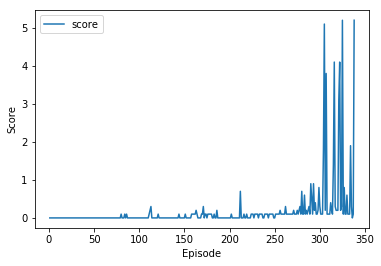

In [25]:
plt.plot(np.arange(1, len(scores)+1), scores, label='score')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper left')
plt.show()

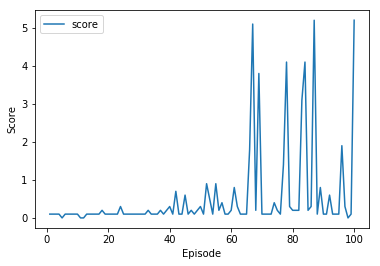

In [26]:
plt.plot(np.arange(1, len(scores_deque)+1), scores_deque, label='score')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper left')
plt.show()